## Principal Component Analysis (PCA)

PCA is a powerful dimensionality reduction technique that transforms data into a set of orthogonal components that capture the most variance in the dataset. This technique helps in visualizing high-dimensional data and feature selection.

> ISLP Ch.12.2 , Bishop Ch.12.1

![PCA example](./imgs/pca.png)

> Example from James, Gareth, et al. An introduction to statistical learning: With applications in python


### Covariance Matrix
The covariance matrix represents how different features in the dataset vary together. For a dataset with $n$ samples and $p$ features, the covariance matrix $C$ is defined as:

$$
C = \frac{1}{n - 1} (X - \bar{X})^T (X - \bar{X})
$$

Where:
- $X$ is the centered data matrix of shape $n \times p$ (after subtracting the mean).
- $\bar{X}$ is the mean of each feature, represented as a vector of shape $1 \times p$.

The resulting covariance matrix $C$ has dimensions $p \times p$, where each entry $C_{ij}$ represents the covariance between feature $i$ and feature $j$. The diagonal elements of the covariance matrix represent the variance of each feature.

### Eigen Decomposition
The eigen decomposition of the covariance matrix allows us to find the eigenvalues and eigenvectors:

$$
C = V \Lambda V^T
$$

Where:
- $V$ is the matrix of **eigenvectors**, which represent the **principal components**.
- $\Lambda$ is a diagonal matrix containing **eigenvalues**, which represent the **variance explained by each principal component**.

By construction, the principal components are linear combinations of the original features and are independent of each other.

## Example of PCA from scratch on iris dataset

In [67]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

n_samples, n_features = X.shape
print("samples: ", n_samples)
print("features: ", n_features)
print('labels: ', len(np.unique(y)))

samples:  150
features:  4
labels:  3


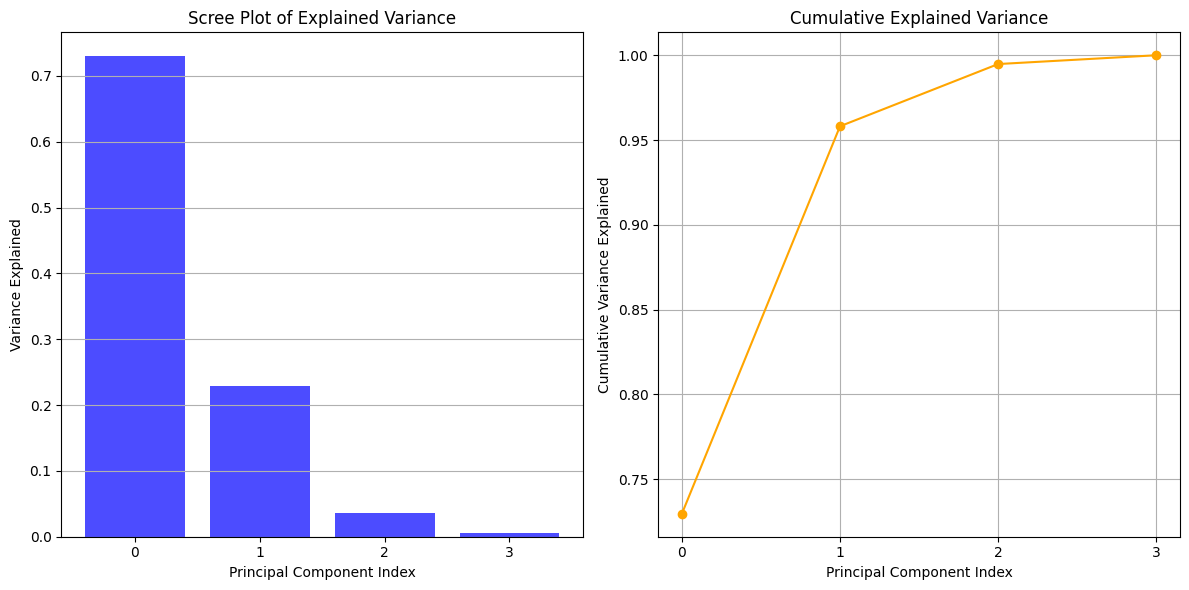

In [68]:
import matplotlib.pyplot as plt
from numpy import linalg

# center the data
X -= X.mean(axis=0)
X /= X.std(axis=0)

# compute the covariance matrix
cov = np.cov(X.T)

# eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = linalg.eig(cov)

# sort the eigenvectors by decreasing eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# explained variance ratio
explained_variance = eigenvalues / np.sum(eigenvalues)

# cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# plot the explained variance of each principal component
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, color='blue')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')
plt.xticks(range(len(explained_variance)))  
plt.grid(axis='y')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(len(cumulative_variance)))  
plt.grid()

plt.tight_layout()
plt.show()

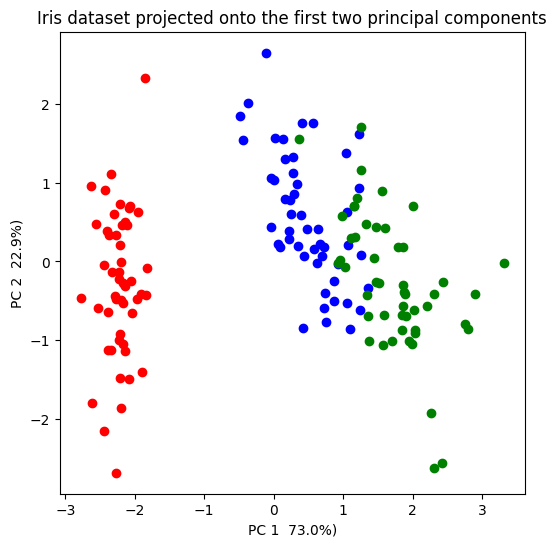

In [69]:
# project the data onto the first two principal components
X_pca = X.dot(eigenvectors[:, :2])

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Setosa')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Versicolor')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color='green', label='Virginica')
plt.xlabel('PC 1  {:.1f}%)'.format(explained_variance[0] * 100))
plt.ylabel('PC 2  {:.1f}%)'.format(explained_variance[1] * 100))
plt.title('Iris dataset projected onto the first two principal components')
plt.show()

In [70]:
# Get the most important features for the first principal component
important_features = eigenvectors[:, :1]  
important_features 

array([[ 0.52106591],
       [-0.26934744],
       [ 0.5804131 ],
       [ 0.56485654]])

## Dimensionality reduction with PCA on the MNIST Dataset

In [71]:
import gzip
import os
import numpy as np
import struct


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        _, _ = struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        _, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(num, rows*cols)

    return images, labels

# Load the dataset
mnist_path = '../supplemental_material/MNIST'
X_train, y_train = load_mnist(mnist_path, kind='train')
X_test, y_test = load_mnist(mnist_path, kind='t10k')

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")    

Training set shape: (60000, 784), Training labels shape: (60000,)
Test set shape: (10000, 784), Test labels shape: (10000,)


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# center data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Perform PCA on the scaled training data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca.fit(X_train_scaled)

# Print the number of components
print(f"Number of components: {pca.n_components_}")

Number of components: 331


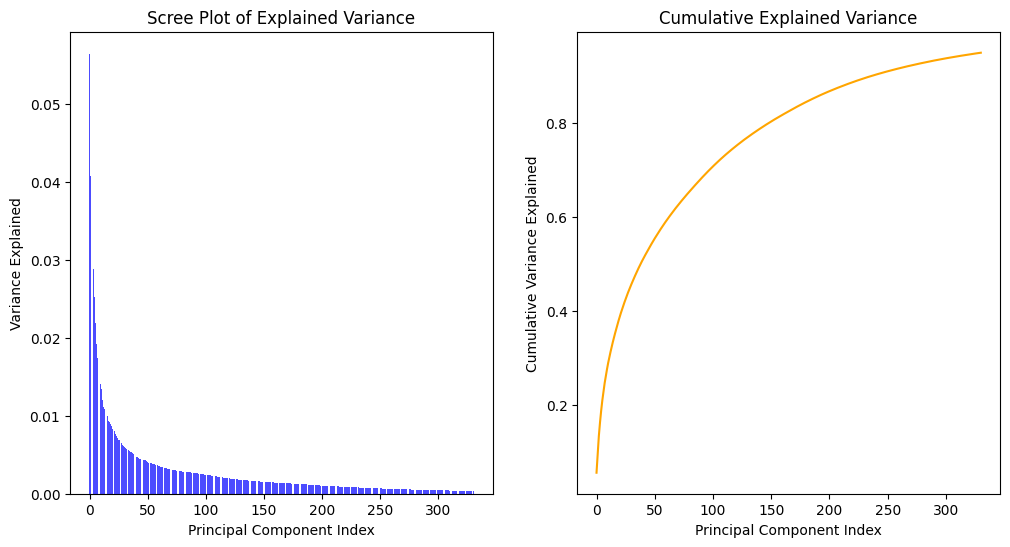

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.7, color='blue')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [74]:
from sklearn.neural_network import MLPClassifier

# Train a MLP classifier on the features extracted by PCA
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = MLPClassifier(solver = 'lbfgs',max_iter=10)
model.fit(X_train_pca, y_train)

train_accuracy = model.score(X_train_pca, y_train)
test_accuracy = model.score(X_test_pca, y_test)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

c:\Users\rodani\OneDrive - Area Science Park\Documenti\GitHub\Introduction-Statistical-Data-Analysis-Machine-Learning\.env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train accuracy: 0.93
Test accuracy: 0.93


## UMAP: Uniform Manifold Approximation and Projection

UMAP is a powerful dimensionality reduction technique that is particularly effective for visualizing high-dimensional data in lower dimensions. It is based on manifold learning and is especially useful when the data has a complex, non-linear structures.


- **Construct a Graph**: UMAP builds a weighted graph by defining neighborhoods based on distances between data points.

- **Compute connection probabilities**: It computes connection probabilities of connections to neighbors using a kernel (usually Gaussian), reflecting local density.

- **Optimize the Graph**: The algorithm finds a low-dimensional representation that preserves relationships from the high-dimensional space.

### Important Parameters:
- **n_neighbors**: 
  Controls the balance between local and global structure. 

- **min_distance**: 
  Sets the minimum spacing between points in the lower-dimensional space


![UMAP parameters](./imgs/umap_params.PNG)

> Credit: McInnes, Leland, John Healy, and James Melville. "Umap: Uniform manifold approximation and projection for dimension reduction." arXiv preprint arXiv:1802.03426 (2018).

For further information on the underlying math and it's comparison with other dimensionality reduction techniques refer to the  [UMAP paper](https://arxiv.org/abs/1802.03426), while for practical use cases refer to the [umap-learn package documentation](https://umap-learn.readthedocs.io/en/latest/index.html).

### Umap and PCA comparison on Moons dataset

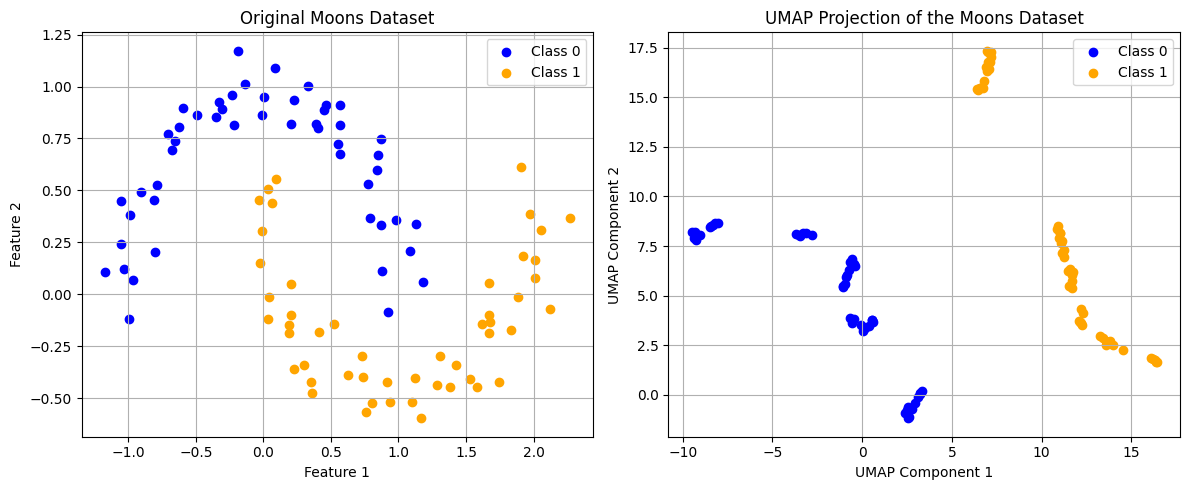

In [75]:
import umap
from sklearn.datasets import make_moons

# Generate a sample dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(12, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
plt.title('Original Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Plot UMAP results
plt.subplot(1, 2, 2)
plt.scatter(X_umap[y == 0][:, 0], X_umap[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_umap[y == 1][:, 0], X_umap[y == 1][:, 1], color='orange', label='Class 1')
plt.title('UMAP Projection of the Moons Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


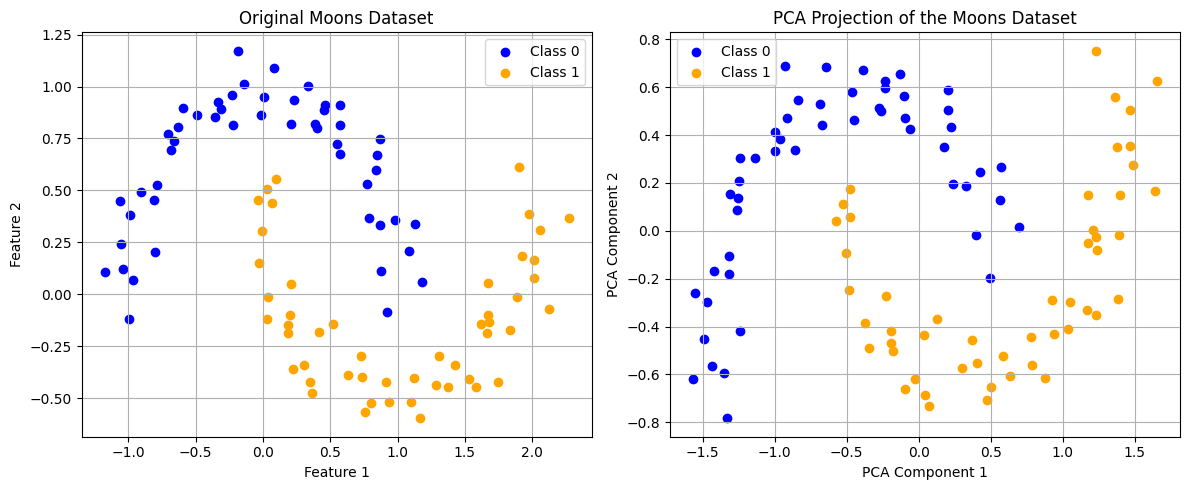

In [78]:
pca_model = PCA(n_components=2)

X_pca = pca_model.fit_transform(X)

# Set up the figure for plotting
plt.figure(figsize=(12, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
plt.title('Original Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Plot PCA results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], color='orange', label='Class 1')
plt.title('PCA Projection of the Moons Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()